<p>This notebook requires images in a directory with the following structure:
<code>
signs
    test
        stop
        no-vehicles
    train
        vehicles
        no-vehicles
</code>

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.preprocessing import image

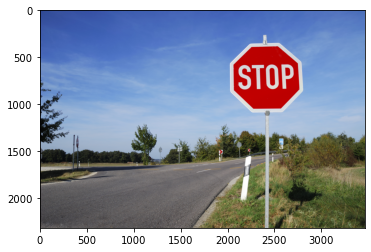

In [45]:
car1 = cv2.imread('signs/train/stop/2.jpg')
car1 = cv2.cvtColor(car1,cv2.COLOR_BGR2RGB)
plt.imshow(car1)

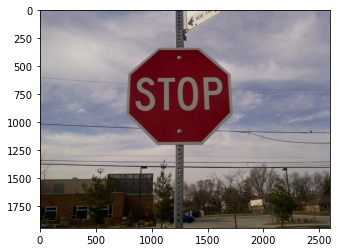

In [46]:
car2 = cv2.imread('signs/test/stop/8.jpg')
car2 = cv2.cvtColor(car2,cv2.COLOR_BGR2RGB)
plt.imshow(car2)

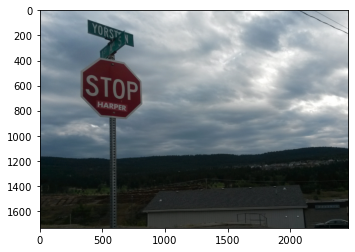

In [47]:
car3 = cv2.imread('signs/test/stop/10.jpg')
car3 = cv2.cvtColor(car3,cv2.COLOR_BGR2RGB)
plt.imshow(car3)

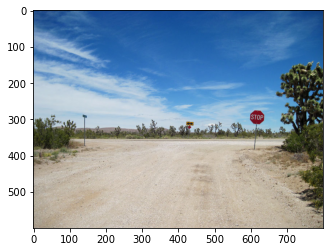

In [48]:
car4 = cv2.imread('signs/test/stop/28.jpg')
car4 = cv2.cvtColor(car4,cv2.COLOR_BGR2RGB)
plt.imshow(car4)

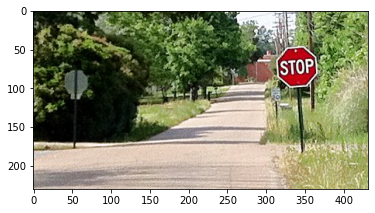

In [44]:
car5 = cv2.imread('signs/test/stop/43.jpg')
car5 = cv2.cvtColor(car5,cv2.COLOR_BGR2RGB)
plt.imshow(car5)

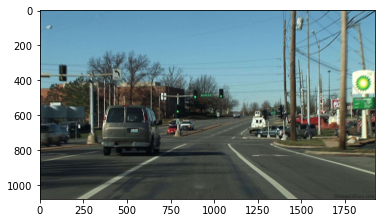

In [51]:
ncar1 = cv2.imread('signs/test/no-stop/102.jpg')
ncar1 = cv2.cvtColor(ncar1,cv2.COLOR_BGR2RGB)
plt.imshow(ncar1)

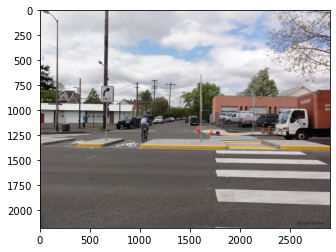

In [53]:
ncar2 = cv2.imread('signs/test/no-stop/111.jpg')
ncar2 = cv2.cvtColor(ncar2,cv2.COLOR_BGR2RGB)
plt.imshow(ncar2)

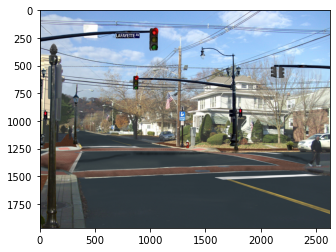

In [54]:
ncar3 = cv2.imread('signs/test/no-stop/129.jpg')
ncar3 = cv2.cvtColor(ncar3,cv2.COLOR_BGR2RGB)
plt.imshow(ncar3)

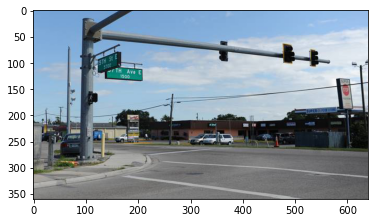

In [55]:
ncar4 = cv2.imread('signs/test/no-stop/133.jpg')
ncar4 = cv2.cvtColor(ncar4,cv2.COLOR_BGR2RGB)
plt.imshow(ncar4)

In [26]:
vehicle_file = 'signs/train/no-stop/107.jpg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

Probability that image is a stop sign is: [[0.02318856]] 


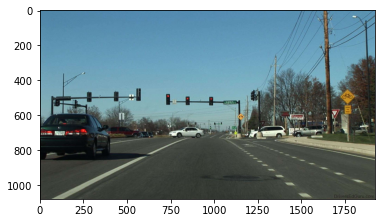

In [5]:
plt.imshow(no_car1)

In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
image_gen = ImageDataGenerator(rotation_range=5, # rotate the image 5 degrees
                               width_shift_range=0.2, # Shift the pic width by a max of 10%
                               height_shift_range=0.2, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalizing it.
                               shear_range=0.02, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.02, # Zoom in by 20% max
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

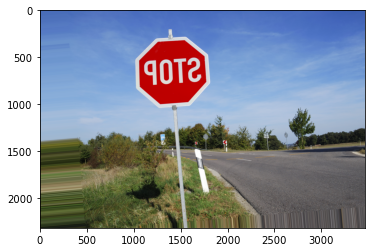

In [8]:
plt.imshow(image_gen.random_transform(car1))

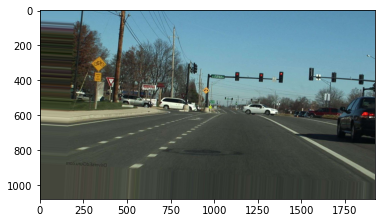

In [9]:
plt.imshow(image_gen.random_transform(no_car1))

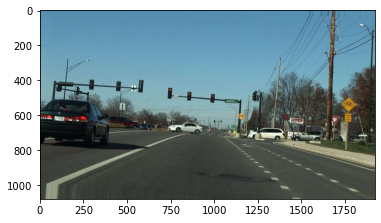

In [10]:
plt.imshow(image_gen.random_transform(no_car1))

In [11]:
print('image shapes. ',car1.shape,' no sign: ',no_car1.shape)

image shapes.  (2316, 3460, 3)  no sign:  (1080, 1920, 3)


In [12]:
source_dir = 'signs/train'
image_gen.flow_from_directory(source_dir) #

Found 157 images belonging to 2 classes.


### Resizing Images

Let's have Keras resize all the images to 150 pixels by 150 pixels once they've been manipulated.

In [13]:
# width,height,channels
image_shape = (150,150,3)

# Creating the Model

In [14]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [15]:
model = Sequential()
model.reset_states() # not sure when I should do this. 

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2021-11-03 14:01:03.984317: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-03 14:01:03.984685: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-03 14:01:03.984997: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

### Training the Model

In [17]:
batch_size = 10
train_set = 'signs/train'
train_image_gen = image_gen.flow_from_directory(train_set,
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 157 images belonging to 2 classes.


In [18]:
test_set = 'signs/test'
test_image_gen = image_gen.flow_from_directory(test_set,
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 40 images belonging to 2 classes.


In [19]:
train_image_gen.class_indices

{'no-stop': 0, 'stop': 1}

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
epochs = 50

In [65]:
# model.reset_states() # not sure when I should do this. It doesn't actually reset anything!
results = model.fit_generator(train_image_gen,epochs=epochs,
                              steps_per_epoch=10,
                              validation_data=test_image_gen,
                              validation_steps=10)

Epoch 1/50
10/10 [==============================] - 9s 922ms/step - loss: 0.1045 - accuracy: 0.9600 - val_loss: 0.5892 - val_accuracy: 0.7750
Epoch 2/50
10/10 [==============================] - 6s 606ms/step - loss: 0.1330 - accuracy: 0.9100
Epoch 3/50
10/10 [==============================] - 6s 543ms/step - loss: 0.3537 - accuracy: 0.8866
Epoch 4/50
10/10 [==============================] - 4s 450ms/step - loss: 0.3011 - accuracy: 0.8351
Epoch 5/50
10/10 [==============================] - 5s 560ms/step - loss: 0.3506 - accuracy: 0.8300
Epoch 6/50
10/10 [==============================] - 5s 519ms/step - loss: 0.2399 - accuracy: 0.8660
Epoch 7/50
10/10 [==============================] - 5s 534ms/step - loss: 0.1854 - accuracy: 0.9381
Epoch 8/50
10/10 [==============================] - 5s 557ms/step - loss: 0.2818 - accuracy: 0.9278
Epoch 9/50
10/10 [==============================] - 5s 526ms/step - loss: 0.4146 - accuracy: 0.8454
Epoch 10/50
10/10 [==============================] - 5s 43

In [66]:
model.save('signs.h5')

# Evaluating the Model

In [67]:
results.history['accuracy'][epochs-1] # ending accuracy

0.9278350472450256

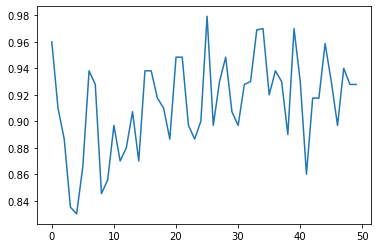

In [68]:
plt.plot(results.history['accuracy'])

# Predicting on new images

In [69]:
train_image_gen.class_indices

{'no-stop': 0, 'stop': 1}

Probability that image is a stop sign is: [[0.04822525]] 


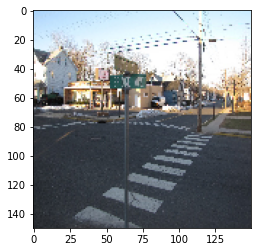

In [70]:
vehicle_file = 'signs/train/no-stop/107.jpg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

Probability that image is a stop sign is: [[0.9545896]] 


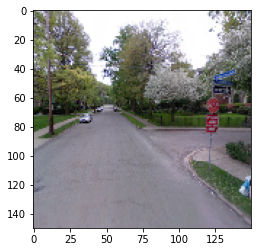

In [71]:
vehicle_file = 'signs/test/stop/51.png'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

Probability that image is a stop sign is: [[1.]] 


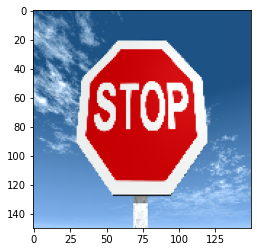

In [72]:
vehicle_file = 'signs/stop-sign-violations-florida.jpg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

Probability that image is a stop sign is: [[7.3167584e-08]] 


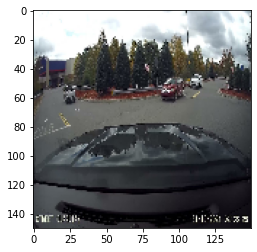

In [73]:
vehicle_file = 'signs/no-stop-sign.jpg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

 Find an image of a street without a stop sign or with a stop sign that will be incorrectly classified by your classifier. Seal of the city of East Palo Alto.  



Probability that image is a stop sign is: [[0.9999995]] 


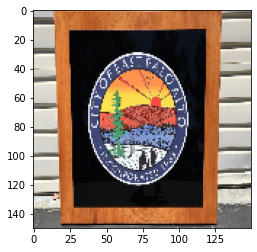

In [74]:
vehicle_file = 'signs/east-palo-alto-seal.jpg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

Probability that image is a stop sign is: [[1.]] 


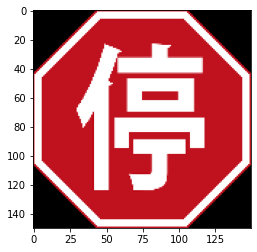

In [75]:
vehicle_file = 'signs/alto.png'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

Probability that image is a stop sign is: [[1.]] 


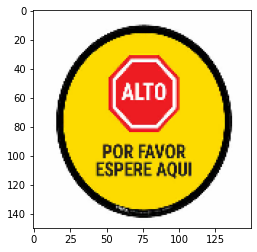

In [76]:
vehicle_file = 'signs/por-favor-alto.jpg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

Probability that image is a stop sign is: [[1.]] 


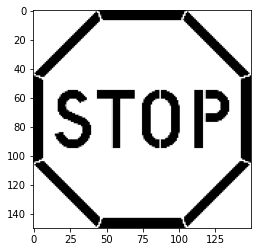

In [77]:
vehicle_file = 'signs/001-sign-stop.gif'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')